<a href="https://colab.research.google.com/github/AhmadAlAshery/Tensorflow/blob/main/fourth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# first file

In [ ]:
df = pd.read_csv("/content/BM4 (3).csv" )#, parse_dates=['Date'])

In [ ]:
df["DateTime"] = pd.to_datetime(df['Date'] + ' ' + df["Time"])

In [ ]:
df.drop(['Date', "Time"], axis=1, inplace=True)

In [ ]:
for i in list(df.columns):
    try:
        if df[i].sum() == 0:
            df.drop([i], axis=1, inplace=True)
    except Exception as e:
        print(e)

'DatetimeArray' does not implement reduction 'sum'


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   A6BM.FLS2    1440 non-null   float64       
 1   A6BM.FLS1    1440 non-null   float64       
 2   A6BM.PS10    1440 non-null   float64       
 3   A6BM.PS11    1440 non-null   float64       
 4   A6BM.PS12    1440 non-null   float64       
 5   A6BM.Cnow    1440 non-null   int64         
 6   A6BM.Clast   1440 non-null   int64         
 7   A6BM.Pwr     1440 non-null   float64       
 8   A6BM.OilT    1440 non-null   float64       
 9   A6BM.OilL    1440 non-null   float64       
 10  A6BM.PS15    1440 non-null   int64         
 11  A6BM.PS16    1440 non-null   float64       
 12  A6BM.PS17    1440 non-null   float64       
 13  A6BM.PS18    1440 non-null   float64       
 14  A6BM.PS19    1440 non-null   float64       
 15  A6BM.PS20    1440 non-null   float64       
 16  A6BM.P

In [ ]:
df.head(50)

,A6BM.FLS2,A6BM.FLS1,A6BM.PS10,A6BM.PS11,A6BM.PS12,A6BM.Cnow,A6BM.Clast,A6BM.Pwr,A6BM.OilT,A6BM.OilL,...,A6BM.PS16,A6BM.PS17,A6BM.PS18,A6BM.PS19,A6BM.PS20,A6BM.PS21,A6BM.WinT,A6BM.WoutT,A6BM.OilTot,DateTime
0,2.54,13.80,244.9,238.8,24.6,67248,114109,33.60,41.7,44.3,...,97.8,102.4,5.8,75.8,4.8,6.1,49.5,22.6,34.9,2022-07-27 00:00:00
1,2.57,12.50,246.7,237.9,24.7,67524,114109,16.91,41.7,44.3,...,97.7,102.3,5.6,73.6,4.8,6.2,42.6,22.3,34.6,2022-07-27 00:01:00
2,2.55,12.90,246.3,238.8,25.0,67831,114109,34.06,41.7,44.2,...,97.8,102.2,5.4,74.4,4.8,6.1,36.5,22.3,34.5,2022-07-27 00:02:00
3,2.56,12.89,246.3,239.3,24.9,68169,114109,33.97,41.7,44.1,...,97.7,102.0,5.3,74.3,4.8,6.1,38.1,22.1,34.6,2022-07-27 00:03:00
4,2.56,12.42,244.9,237.9,24.4,68413,114109,33.96,41.7,44.1,...,97.8,102.2,5.3,74.0,4.8,6.0,35.8,22.0,34.2,2022-07-27 00:04:00
5,2.56,12.67,250.4,243.0,25.4,68720,114109,16.92,41.7,44.0,...,97.5,101.9,5.3,74.2,4.8,6.0,33.7,22.1,34.5,2022-07-27 00:05:00
6,2.54,12.95,248.6,237.9,24.7,68965,114109,33.95,41.7,44.0,...,97.4,101.6,5.1,74.0,4.8,5.9,35.9,22.2,34.5,2022-07-27 00:06:00
7,2.56,12.61,247.7,237.4,24.8,69272,114109,16.98,41.7,44.1,...,97.4,101.8,5.2,73.9,4.8,5.9,35.5,22.1,34.2,2022-07-27 00:07:00
8,2.55,13.08,247.2,241.6,25.3,69486,114109,16.93,41.7,44.0,...,97.3,102.0,5.1,74.2,4.8,5.9,35.9,22.0,34.5,2022-07-27 00:08:00
9,2.54,12.00,249.5,241.6,25.2,69824,114109,16.92,41.7,44.0,...,97.5,102.1,5.1,74.1,4.7,5.8,35.8,22.3,34.6,2022-07-27 00:09:00


In [ ]:
df.tail()

,A6BM.FLS2,A6BM.FLS1,A6BM.PS10,A6BM.PS11,A6BM.PS12,A6BM.Cnow,A6BM.Clast,A6BM.Pwr,A6BM.OilT,A6BM.OilL,...,A6BM.PS16,A6BM.PS17,A6BM.PS18,A6BM.PS19,A6BM.PS20,A6BM.PS21,A6BM.WinT,A6BM.WoutT,A6BM.OilTot,DateTime
1435,2.48,12.45,250.0,241.1,25.0,62025,128312,17.16,40.6,45.2,...,97.1,101.6,4.8,73.0,5.2,5.7,47.2,22.3,33.6,2022-07-27 23:55:00
1436,2.45,11.92,249.0,240.7,25.0,62363,128312,17.12,40.6,45.3,...,97.1,101.5,4.8,73.4,5.2,5.8,50.5,22.3,33.4,2022-07-27 23:56:00
1437,2.49,12.48,250.0,241.1,25.0,62608,128312,34.38,40.7,45.3,...,97.1,101.4,4.8,73.8,5.2,5.8,51.7,22.3,33.7,2022-07-27 23:57:00
1438,2.47,12.09,252.3,247.7,25.5,62883,128312,34.46,40.6,45.3,...,97.3,101.8,4.8,74.2,5.2,5.7,51.7,22.2,34.1,2022-07-27 23:58:00
1439,2.47,12.81,252.8,244.9,25.4,63189,128312,17.27,40.6,45.2,...,97.4,101.6,4.8,74.5,5.2,5.7,51.8,22.1,33.9,2022-07-27 23:59:00


In [ ]:
df.describe()

,A6BM.FLS2,A6BM.FLS1,A6BM.PS10,A6BM.PS11,A6BM.PS12,A6BM.Cnow,A6BM.Clast,A6BM.Pwr,A6BM.OilT,A6BM.OilL,A6BM.PS15,A6BM.PS16,A6BM.PS17,A6BM.PS18,A6BM.PS19,A6BM.PS20,A6BM.PS21,A6BM.WinT,A6BM.WoutT,A6BM.OilTot
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,2.489792,12.208813,249.796736,242.213056,25.248681,62791.088194,122037.268750,24.454097,40.958056,44.744931,104.979861,97.361736,101.752083,5.062431,74.218958,5.013958,5.918125,46.628958,22.305833,34.266528
std,0.033523,0.581063,2.938167,3.459868,0.503495,36618.113343,7667.920509,10.206719,0.627285,0.478664,12.825238,0.193612,0.240964,0.279602,0.850276,0.286855,0.144380,8.186942,0.455108,0.983006
min,2.410000,10.180000,240.300000,231.900000,24.400000,10.000000,114109.000000,1.110000,38.600000,43.600000,86.000000,96.900000,101.100000,4.700000,68.400000,4.500000,5.500000,33.500000,21.100000,31.600000
25%,2.460000,11.830000,247.700000,239.800000,24.900000,30172.250000,114398.000000,17.270000,40.700000,44.400000,93.000000,97.200000,101.600000,4.900000,73.500000,4.800000,5.800000,39.400000,22.000000,33.500000
50%,2.490000,12.220000,249.500000,242.100000,25.200000,62301.000000,128312.000000,17.510000,41.000000,44.800000,103.000000,97.300000,101.750000,5.000000,74.300000,5.000000,5.900000,46.500000,22.200000,34.300000
75%,2.510000,12.630000,251.400000,244.400000,25.500000,95890.500000,130237.000000,34.530000,41.400000,45.100000,114.000000,97.500000,101.900000,5.100000,74.800000,5.200000,6.000000,51.900000,22.600000,34.900000
max,2.610000,14.300000,264.400000,257.400000,28.600000,130002.000000,130237.000000,47.770000,41.800000,46.000000,132.000000,98.000000,102.500000,6.100000,76.200000,5.600000,6.400000,69.100000,24.000000,36.500000


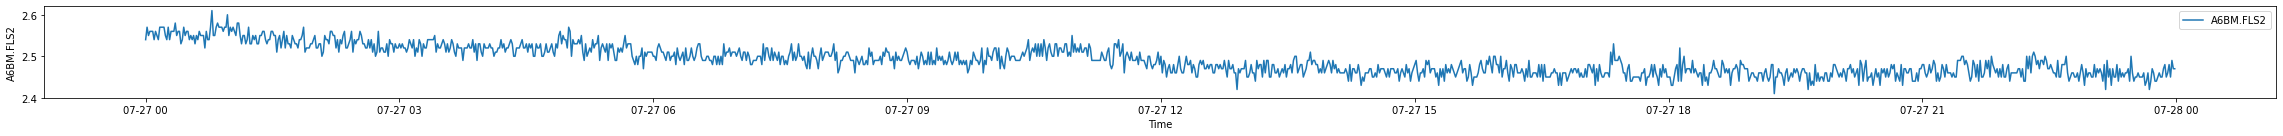

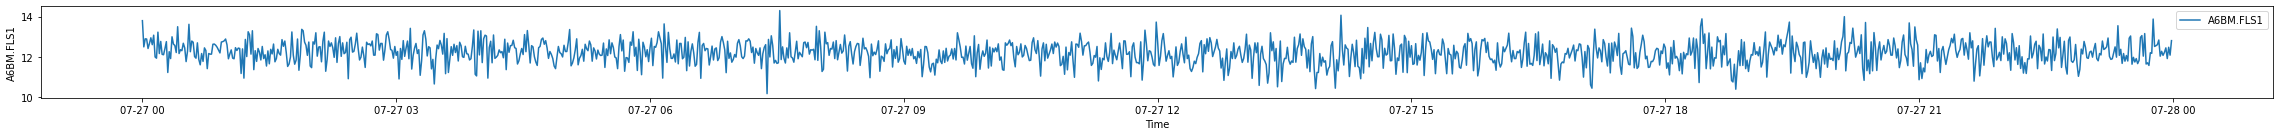

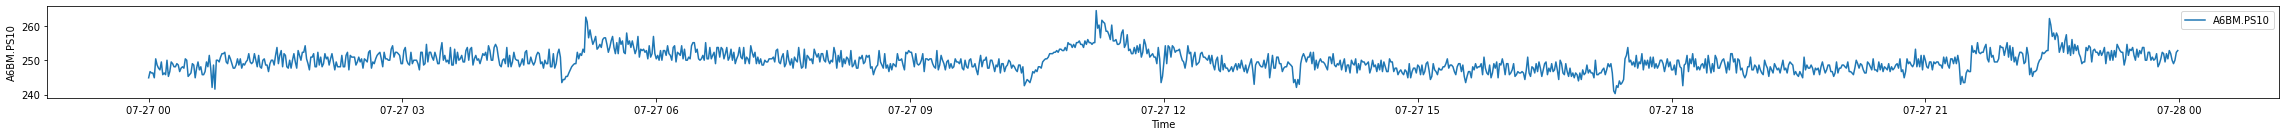

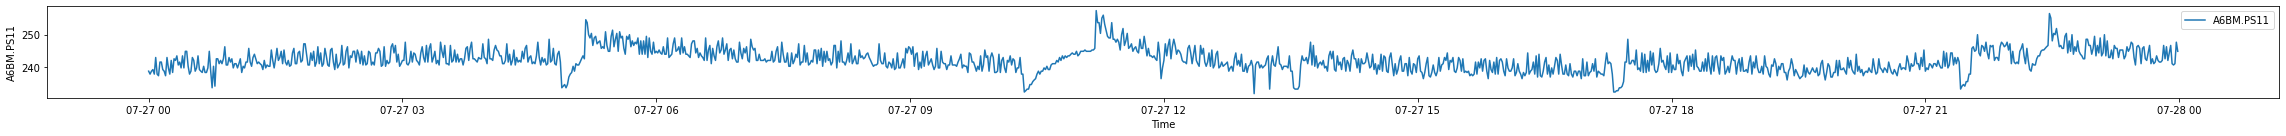

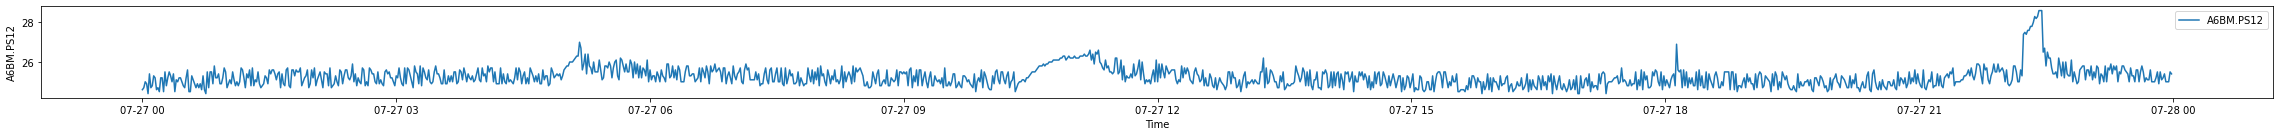

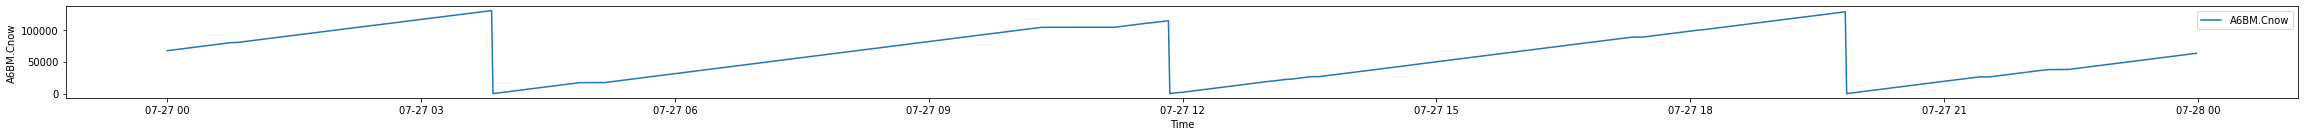

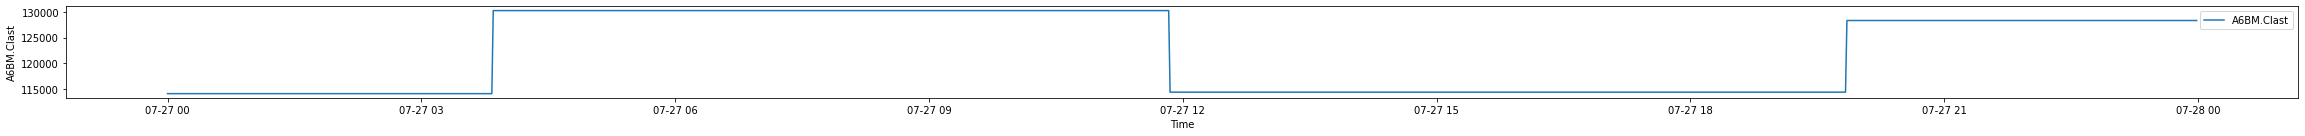

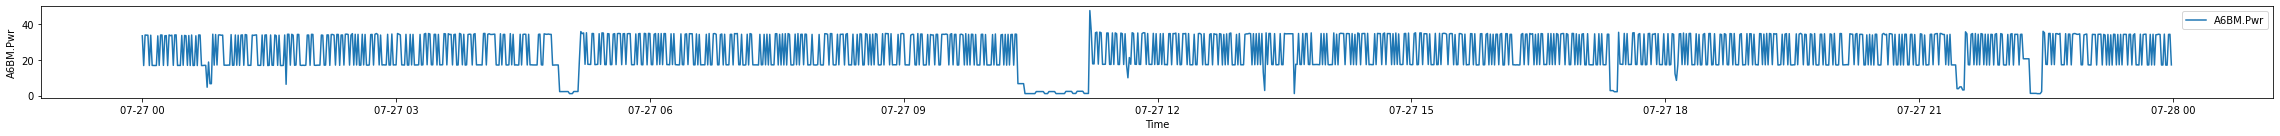

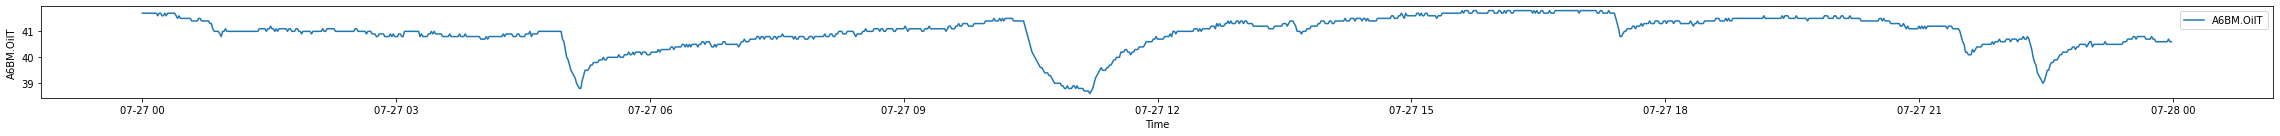

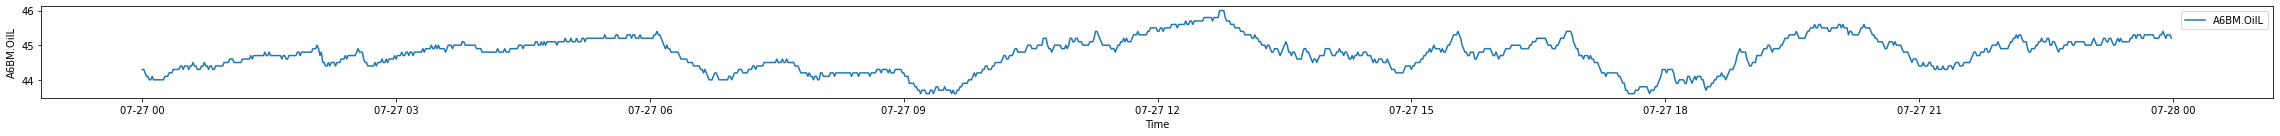

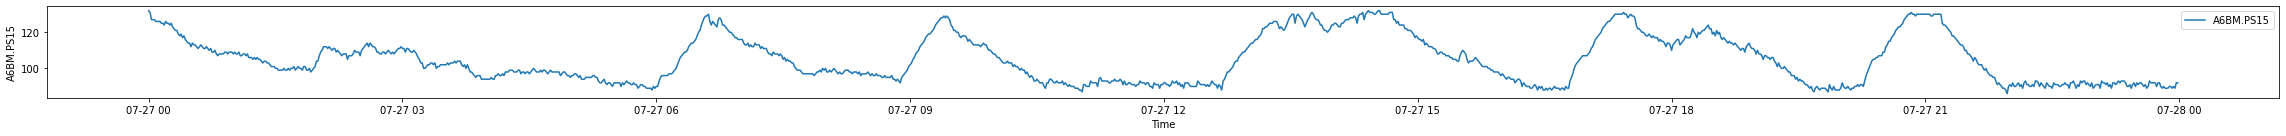

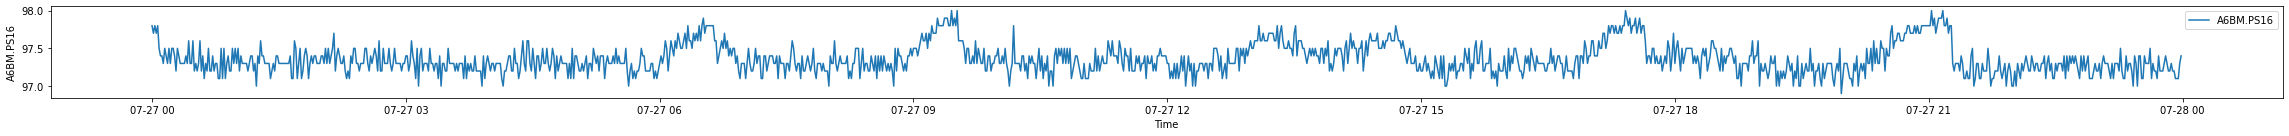

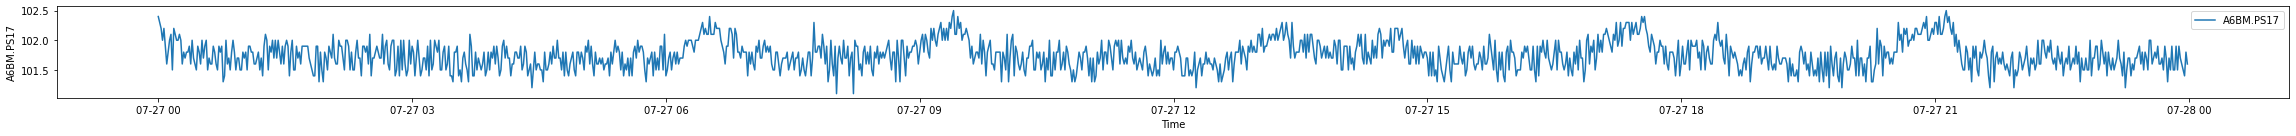

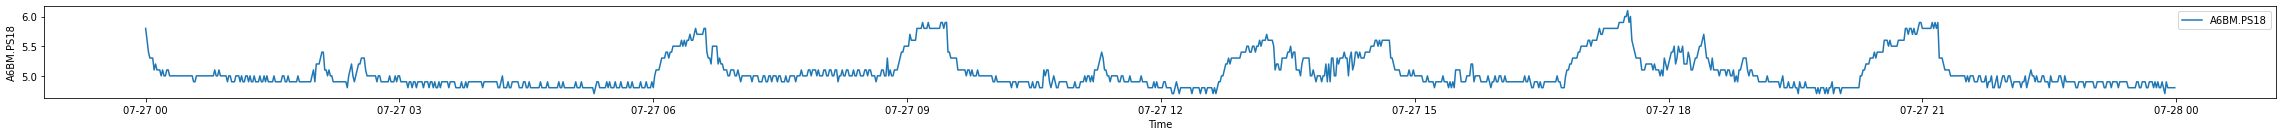

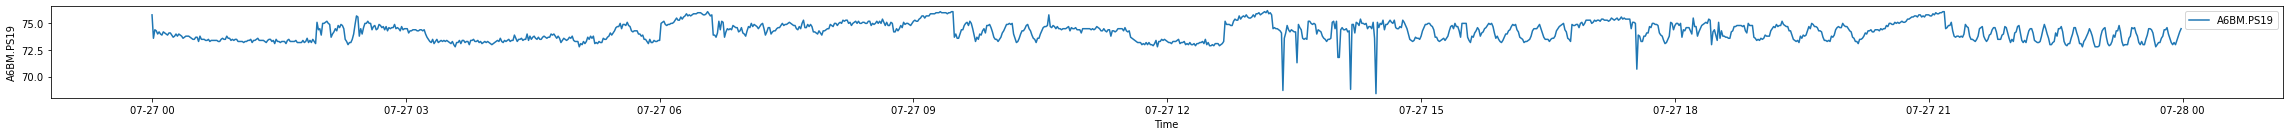

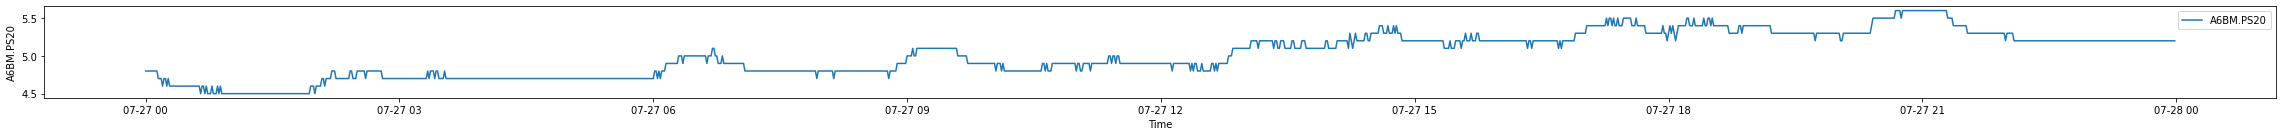

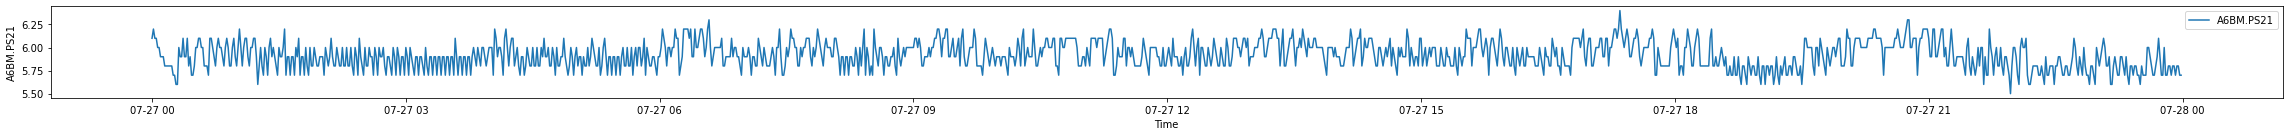

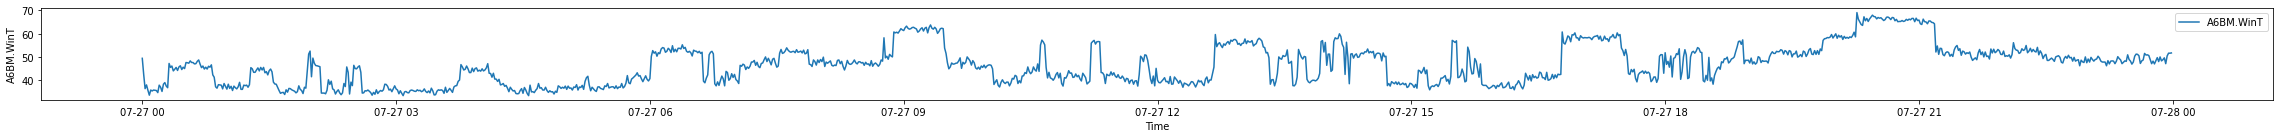

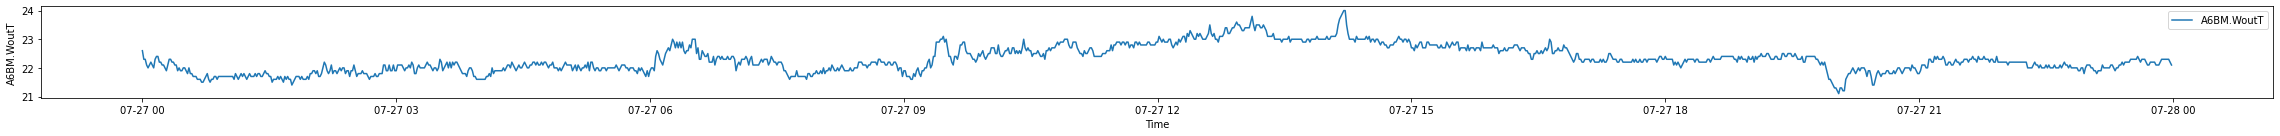

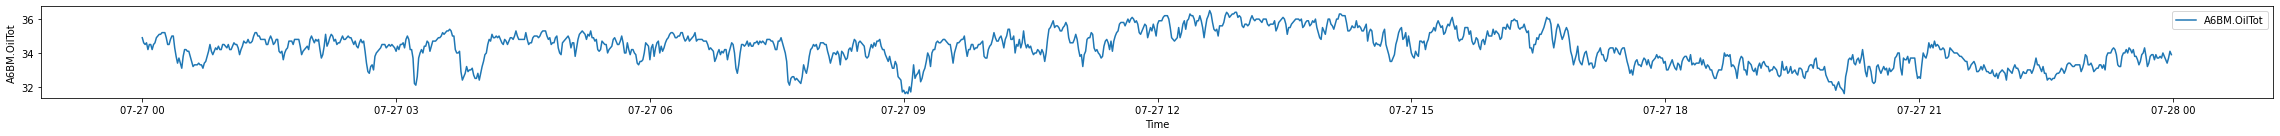

In [ ]:
x =list(df.columns)[:-1]
for i in x:
    plt.figure(figsize=(40,40))
    plt.subplot(len(x),1,x.index(i)+1)
    plt.plot(df["DateTime"], df[i], label=i)
    plt.xlabel('Time')
    plt.ylabel(i)
    plt.legend()
    plt.show()

In [ ]:
tr = df[x].values

In [ ]:
X_train = []
Y_train = []
try:
    for i in range(20, len(tr)):
        
        #r = (-tr[i-1,]+tr[i,])/60
        Y_train.append([tr[i,], tr[i+1,]])
        X_train.append(tr[i-20:i, :])
except Exception as e:
    print(e)

index 1440 is out of bounds for axis 0 with size 1440


In [ ]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
X_train.shape, Y_train.shape

((1419, 20, 20), (1419, 2, 20))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test  = train_test_split(X_train, Y_train, test_size=0.05, shuffle=True)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1348, 20, 20), (71, 20, 20), (1348, 2, 20), (71, 2, 20))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
y_train = scaler.fit_transform(y_train.reshape(-1, y_train.shape[-1])).reshape(y_train.shape)

In [ ]:
x_train.shape, y_train.shape

((1348, 20, 20), (1348, 2, 20))

## first model

In [ ]:
model  = tf.keras.Sequential([
    tf.keras.layers.LSTM(200, return_sequences=True, input_shape=(20, len(x))),
    tf.keras.layers.SimpleRNN(150, return_sequences=True),
    tf.keras.layers.SimpleRNN(100, return_sequences=False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(len(x))
])

In [ ]:
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-7, momentum=0.9),
              metrics=["mae"])

In [ ]:
history = model.fit(x_train, y_train[:,0,:], epochs=200, callbacks=[tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch / 30))])


Epoch 1/200
43/43 [==============================] - 4s 37ms/step - loss: 0.5216 - mae: 0.9131 - lr: 1.0000e-07
Epoch 2/200
43/43 [==============================] - 2s 37ms/step - loss: 0.5250 - mae: 0.9175 - lr: 1.0798e-07
Epoch 3/200
43/43 [==============================] - 2s 37ms/step - loss: 0.5231 - mae: 0.9145 - lr: 1.1659e-07
Epoch 4/200
43/43 [==============================] - 2s 37ms/step - loss: 0.5301 - mae: 0.9232 - lr: 1.2589e-07
Epoch 5/200
43/43 [==============================] - 2s 38ms/step - loss: 0.5291 - mae: 0.9211 - lr: 1.3594e-07
Epoch 6/200
43/43 [==============================] - 2s 37ms/step - loss: 0.5189 - mae: 0.9105 - lr: 1.4678e-07
Epoch 7/200
43/43 [==============================] - 2s 39ms/step - loss: 0.5249 - mae: 0.9169 - lr: 1.5849e-07
Epoch 8/200
43/43 [==============================] - 2s 38ms/step - loss: 0.5268 - mae: 0.9205 - lr: 1.7113e-07
Epoch 9/200
43/43 [==============================] - 2s 37ms/step - loss: 0.5239 - mae: 0.9148 - lr: 1.8

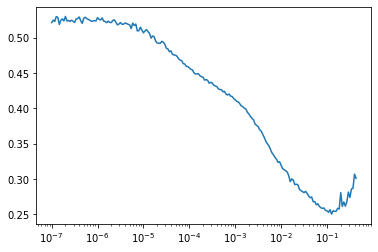

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])


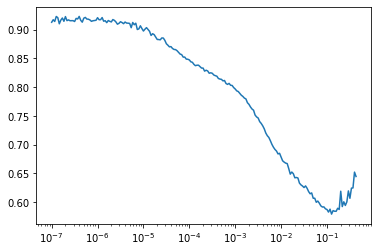

In [ ]:
plt.semilogx(history.history["lr"], history.history["mae"])

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:

xtrain, xval, ytrain, yval  = train_test_split(x_train, y_train, test_size=0.1, shuffle=True)

In [ ]:
xtrain.shape, xval.shape, ytrain.shape, yval.shape

((1213, 20, 20), (135, 20, 20), (1213, 2, 20), (135, 2, 20))

In [ ]:
class ResetStatesCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        self.model.reset_states()

In [ ]:
xtrain.shape, y_train[:,0,:].shape

((1213, 20, 20), (1348, 20))

In [ ]:
model  = tf.keras.Sequential([
    tf.keras.layers.LSTM(512, return_sequences=True),
    tf.keras.layers.Conv1D(filters= 256, kernel_size=5, strides=8, padding='causal', activation='relu', input_shape=(20, len(x))),
    
    tf.keras.layers.SimpleRNN(128, return_sequences=True), 
    tf.keras.layers.SimpleRNN(128, return_sequences=False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(len(x))
])

In [ ]:
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9),
              metrics=["mae"])

In [ ]:
history_2 = model.fit(xtrain, ytrain[:,0,:], epochs=500, validation_data=(xval, yval[:,0,:]), 
                      callbacks=[ tf.keras.callbacks.EarlyStopping(patience=50),
                                 tf.keras.callbacks.ModelCheckpoint("my_checkpoint.h5", save_best_only=True),
                                 ResetStatesCallback()
                                 ])

Epoch 1/500
38/38 [==============================] - 5s 31ms/step - loss: 0.4185 - mae: 0.8081 - val_loss: 0.4073 - val_mae: 0.7881
Epoch 2/500
38/38 [==============================] - 1s 16ms/step - loss: 0.3904 - mae: 0.7693 - val_loss: 0.3800 - val_mae: 0.7525
Epoch 3/500
38/38 [==============================] - 1s 16ms/step - loss: 0.3651 - mae: 0.7348 - val_loss: 0.3538 - val_mae: 0.7173
Epoch 4/500
38/38 [==============================] - 1s 15ms/step - loss: 0.3409 - mae: 0.7033 - val_loss: 0.3264 - val_mae: 0.6809
Epoch 5/500
38/38 [==============================] - 1s 15ms/step - loss: 0.3172 - mae: 0.6711 - val_loss: 0.2992 - val_mae: 0.6411
Epoch 6/500
38/38 [==============================] - 1s 15ms/step - loss: 0.2939 - mae: 0.6388 - val_loss: 0.2765 - val_mae: 0.6081
Epoch 7/500
38/38 [==============================] - 1s 15ms/step - loss: 0.2783 - mae: 0.6169 - val_loss: 0.2618 - val_mae: 0.5882
Epoch 8/500
38/38 [==============================] - 1s 15ms/step - loss: 0.

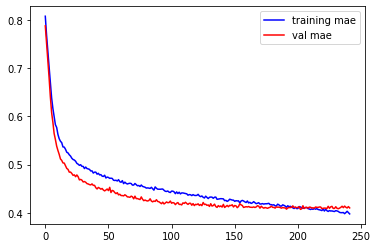

In [ ]:
plt.plot(history_2.history['mae'], color='b', label="training mae")
plt.plot(history_2.history['val_mae'], color='r', label="val mae")
plt.legend()

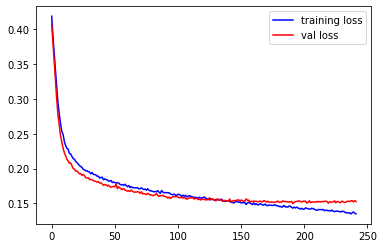

In [ ]:
plt.plot(history_2.history['loss'], color='b', label="training loss")
plt.plot(history_2.history['val_loss'], color='r', label="val loss")
plt.legend()

In [ ]:
p = model.predict(x_test)

3/3 [==============================] - 1s 8ms/step


In [ ]:
p

array([[ 0.23489428, -0.01541562, -0.53973067, ...,  0.61738664,
         0.9512305 ,  0.45931026],
       [ 0.1796371 , -0.1436971 , -0.68025887, ...,  0.1637787 ,
         1.3352181 ,  0.9948453 ],
       [-1.0053514 , -0.3534142 , -0.5405678 , ..., -0.75919026,
         1.8799075 ,  2.081444  ],
       ...,
       [ 0.45457304, -0.01866248, -0.73551816, ...,  0.8924516 ,
         0.2748488 , -0.09550012],
       [-0.98972774, -0.28737733, -0.7068481 , ..., -1.0123127 ,
         1.8350313 ,  2.045459  ],
       [-0.55973303, -0.26088825, -0.9479302 , ...,  0.87825257,
         1.2753414 ,  0.59388447]], dtype=float32)

In [ ]:
pp =scaler.inverse_transform(p)

In [ ]:
pp

array([[  2.496418 ,  12.195978 , 248.23674  , ...,  51.799904 ,
         22.74701  ,  34.719444 ],
       [  2.4946108,  12.121457 , 247.82394  , ...,  48.10813  ,
         22.922724 ,  35.247334 ],
       [  2.4558523,  11.999629 , 248.23428  , ...,  40.59637  ,
         23.171976 ,  36.31842  ],
       ...,
       [  2.5036032,  12.194092 , 247.66164  , ...,  54.038574 ,
         22.437494 ,  34.172554 ],
       [  2.4563632,  12.037991 , 247.74585  , ...,  38.53628  ,
         23.151442 ,  36.282948 ],
       [  2.4704275,  12.053379 , 247.03769  , ...,  53.92301  ,
         22.895325 ,  34.852097 ]], dtype=float32)

In [ ]:
y_test[:,0,0][0]

2.48

In [ ]:
pp[:,0].sum()

175.91289

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
(np.abs(pp[:,0][0])/y_test[:,0,0][0])

1.0066201609949912

In [ ]:
pred_v = []
true_v = []
for i in range(len(y_test[:,0,0])):
    true_v.append(0)
    if 1.1 > ((pp[:,0][i])/y_test[:,0,0][i]) >0.9:
        pred_v.append(0)
    else:
        pred_v.append(1)

In [ ]:
sum(pred_v)

0

In [ ]:
sum(true_v)

0

In [ ]:
np.savetxt("pp_3_1.csv", pp, delimiter=",")
np.savetxt("p_3_1.csv", p, delimiter=",")

## second model

In [ ]:
model_1  = tf.keras.Sequential([
    tf.keras.layers.LSTM(512, return_sequences=True),
    tf.keras.layers.Conv1D(filters= 256, kernel_size=5, strides=8, padding='causal', activation='relu', input_shape=(20, len(x))),
    
    tf.keras.layers.SimpleRNN(128, return_sequences=True), 
    tf.keras.layers.SimpleRNN(128, return_sequences=False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(len(x))
])

In [ ]:
model_1.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9),
              metrics=["mae"])

In [ ]:
history_3 = model_1.fit(xtrain, ytrain[:,1,:], epochs=500, validation_data=(xval, yval[:,1,:]), 
                      callbacks=[ tf.keras.callbacks.EarlyStopping(patience=50),
                                 tf.keras.callbacks.ModelCheckpoint("my_checkpoint_1_2.h5", save_best_only=True),
                                 ResetStatesCallback()
                                 ])

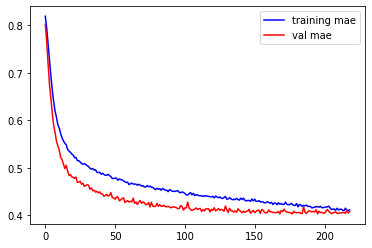

In [ ]:
plt.plot(history_3.history['mae'], color='b', label="training mae")
plt.plot(history_3.history['val_mae'], color='r', label="val mae")
plt.legend()

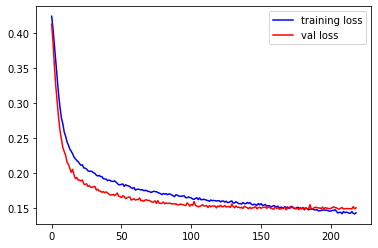

In [ ]:
plt.plot(history_3.history['loss'], color='b', label="training loss")
plt.plot(history_3.history['val_loss'], color='r', label="val loss")
plt.legend()

In [ ]:
tf.keras.models.save_model(model_1,'1_2.h5')

In [ ]:
p = model_1.predict(x_test)

3/3 [==============================] - 1s 6ms/step


In [ ]:
p

array([[ 0.3185886 , -0.07592811, -0.34436166, ...,  0.9377694 ,
        -0.45978352, -0.17535283],
       [ 0.29326957, -0.21268637,  0.8075351 , ...,  0.806143  ,
        -0.33923274, -0.53164816],
       [-0.02744178, -0.22164673, -0.437487  , ...,  0.6002299 ,
         0.64280546, -0.49628803],
       ...,
       [ 0.6999784 ,  0.08727472, -0.21581893, ...,  0.27228484,
        -0.52971923,  0.00355956],
       [-0.0395342 , -0.2307558 , -0.09859915, ...,  0.7332632 ,
         0.7615944 , -0.55875933],
       [ 0.5201015 , -0.18340246, -0.7293177 , ...,  0.19971067,
         0.6313094 , -0.17870209]], dtype=float32)

In [ ]:
pp =scaler.inverse_transform(p)

In [ ]:
pp

array([[  2.4991555,  12.160826 , 248.81062  , ...,  54.407402 ,
         22.101322 ,  34.09384  ],
       [  2.4983275,  12.08138  , 252.1942   , ...,  53.336136 ,
         22.156487 ,  33.742634 ],
       [  2.4878376,  12.076175 , 248.53706  , ...,  51.66027  ,
         22.605873 ,  33.77749  ],
       ...,
       [  2.5116298,  12.255632 , 249.1882   , ...,  48.991226 ,
         22.069319 ,  34.2702   ],
       [  2.487442 ,  12.070883 , 249.53252  , ...,  52.74299  ,
         22.66023  ,  33.715908 ],
       [  2.5057466,  12.098392 , 247.67984  , ...,  48.40057  ,
         22.60061  ,  34.09054  ]], dtype=float32)

In [ ]:
y_test[:,0,0][0]

2.48

In [ ]:
pp[:,0].sum()

177.21696

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
(np.abs(pp[:,0][0])/y_test[:,0,0][0])

1.007724000561622

In [ ]:
pred_v = []
true_v = []
for i in range(len(y_test[:,0,0])):
    true_v.append(0)
    if 1.1 > ((pp[:,0][i])/y_test[:,0,0][i]) >0.9:
        pred_v.append(0)
    else:
        pred_v.append(1)

In [ ]:
sum(pred_v)

0

In [ ]:
sum(true_v)

0

In [ ]:
np.savetxt("pp_3_2.csv", pp, delimiter=",")
np.savetxt("p_3_2.csv", p, delimiter=",")